# **INTRODUCTION**

# **1. DEFINING THE QUESTION**

# a) Specifying the Question

I am working as a Data Scientist for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables

# b) Defining the Metric for Success

Based on the model that I will create, the company being able to predict prices correctly for the target market will be key.
A good model will mean precise prediction and hence the company is able to make profits since the prices will not be exagerated hence people are able to consider such a company compared to other companies which use different types of predictions which could lead to wrong predicts

# c) Understanding the Context

HassConsult offers investment-grade developments all over the City. The developments have been conceptualized by their development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.
And in order to get a better understanding of the dataset here is a glossary of the columns:

Id

price- Price of the house

bedrooms- Number of Bedrooms
bathrooms- Number of Bathrooms

sqft_living- Square feet area of living area

sqft_lot - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

Dataset

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset]

# d) Recording the Experimental Design

The project was undertaken using the following design Datasets(Independent Project Week 7 - house_data.csv)

Performing EDA

Feature Engineering

Multiple Linear Regression

Quantile regression

Ridge Regression

Lasso Regression

Elastic-Net Regression

Computing the RMSE

Plotting residual plots

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

# e) Data Relevance
Main objective is to study the different factors that affect housing prices and later on design a model for price prediction. From the data provided, most features are well representative to enable creation of a good model

# **2. READING THE DATA**

# Importing the Libraries

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the libraries we shall need

#Analysis Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline


#Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Loading the dataset

In [3]:
#loading the dataset
hass= pd.read_csv('/content/Independent Project Week 7 - house_data.csv')


Checking the dataset

In [4]:
# Determining the no. of records in our dataset
print('Number of records in house_data dataset: ' + str(hass.shape[0]))

Number of records in house_data dataset: 21613


In [5]:
#previewing the top our datasets
hass.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Previewing the bottom of our dataset
# 
hass.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
# Checking whether each column has an appropriate datatype
#
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Bathroom column does not have the right data type because a house cannot have 2.50 bathrooms. Hence this will be converted to an interger in the data cleaning section.

The floors column also will be converted to integer from float for easier handling of the values

The rest of the features have appropriate data for analysis

In [8]:
#obtaining information about the dataset
hass.info

<bound method DataFrame.info of                id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft

In [9]:
# Running a descriptive statistics of the dataset to check the numerical features
# 
hass.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The summary above gives us insights about the dataset. Bathrooms column has the wrong datatype in that a house cannot have point something bathrooms. That needs to be a discrete number. Floors column also reflects the same

# **3. EXTERNAL DATA SOURCE VALIDATION**

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

# **4. DATA CLEANING**

Appropriate datatypes

In [10]:
col_names = hass.dtypes[hass.dtypes != "object"].index 
col_names

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
# Changing datatypes for different features
# Converting bathroom and floor data type from float to integer
hass[['bathrooms', 'floors']] = hass[['bathrooms','floors']].apply(np.int64)
print(hass.dtypes)

id                 int64
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Checking for missing data

In [12]:
# Identifying the Missing Data
hass.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The output displays that there are no missing data

Checking for Outliers

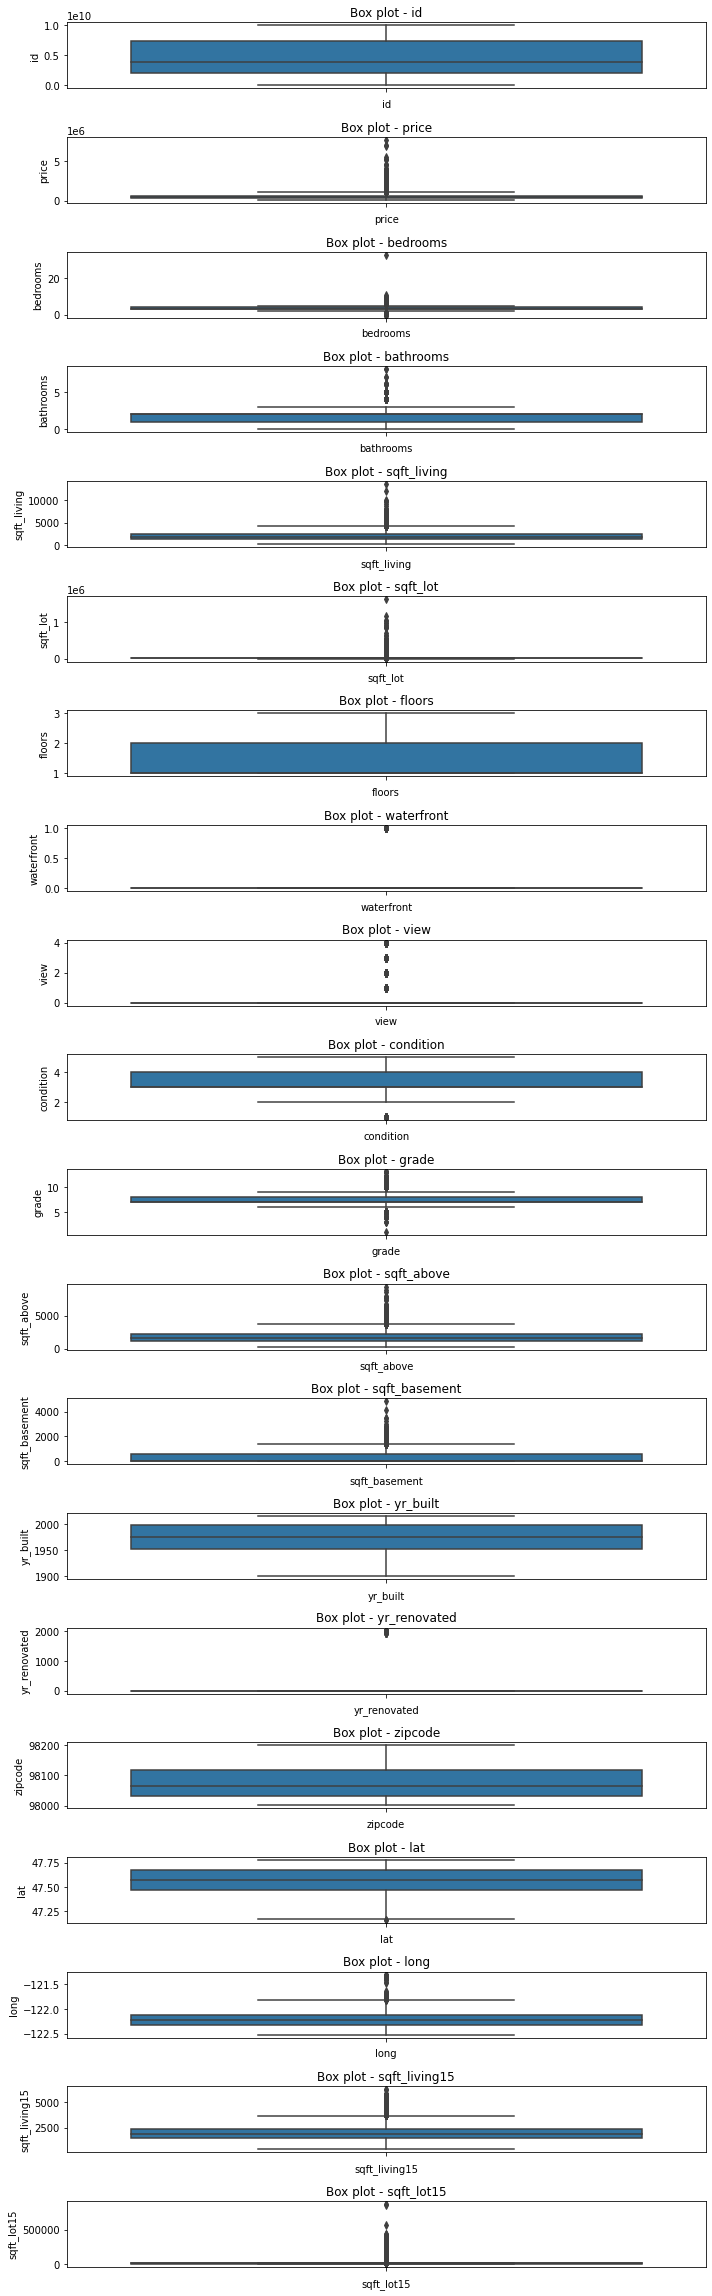

In [13]:
#Checking for Outliers

fig, ax = plt.subplots(len(col_names), figsize=(10,32))
for i, col_val in enumerate(col_names):
    sns.boxplot(y=hass[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=10)
plt.tight_layout()
plt.show()

Checking for Anomalies

In [14]:
# Check for duplicated rows
print('House data duplicates : ', hass.duplicated().any())

# 
# Printing the number of duplicates
print(hass.duplicated().sum())

House data duplicates :  True
3


This means that the house_data has 3 duplicated entries

In [15]:
# Since the duplicated entries are only 3, we remove the duplicates
# removing duplicates

hass.drop_duplicates(keep='first', inplace = True)

print(hass.duplicated().any())

False


The duplicated entries have been removed

In [16]:
# We will use a for loop to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the fifa ranking dataset
print('Cardinality of fifa dataset columns:\n')
for i in hass.columns:
  print(f'{i:<23} : {hass[i].nunique()}')
  

Cardinality of fifa dataset columns:

id                      : 21436
price                   : 3625
bedrooms                : 13
bathrooms               : 9
sqft_living             : 1038
sqft_lot                : 9782
floors                  : 3
waterfront              : 2
view                    : 5
condition               : 5
grade                   : 12
sqft_above              : 946
sqft_basement           : 306
yr_built                : 116
yr_renovated            : 70
zipcode                 : 70
lat                     : 5034
long                    : 752
sqft_living15           : 777
sqft_lot15              : 8689


# **5. EXPLORATORY DATA ANALYSIS**

# Univariate Analysis

Histogram

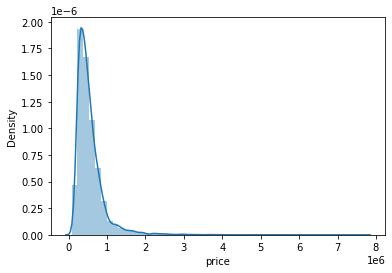

In [17]:
# plot a histogram to visualize the distribution price

sns.distplot(hass['price'])

Price is skewed to the left of the graph which means most house prices range from 500,000 to 2,000,000

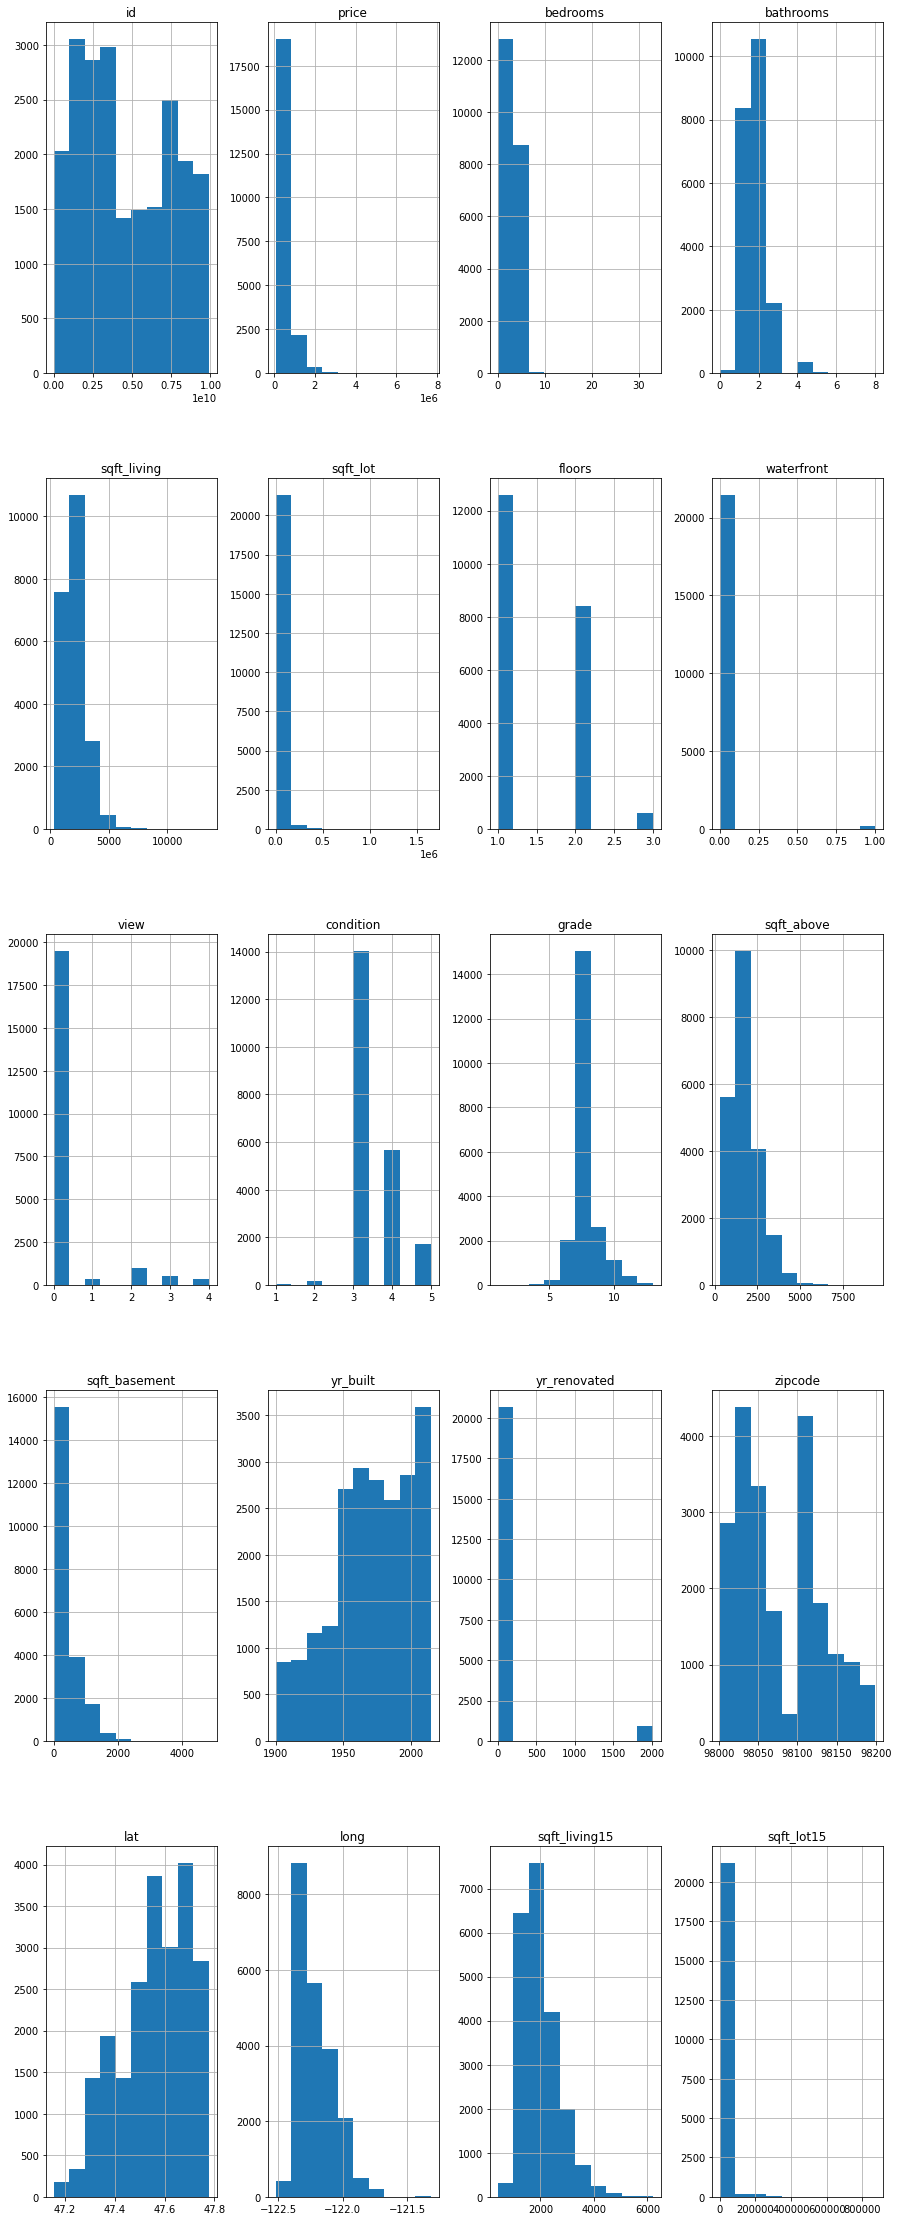

In [18]:
# Univariate Histograms
from matplotlib import pyplot
col_names = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
hass.hist(figsize=(15,40))
plt.show()

From the univariate analysis above, the data is skewed to the left which means that most houses have 1-3 bedrooms. The bedrooms data is also skewed to the left with most of the houses having room ranging from 1-7

Grade data is normally distributed as per the analysis above. Price,sqft_basement,sqft_above,sqft_living are also skewed to the left

Density Plots

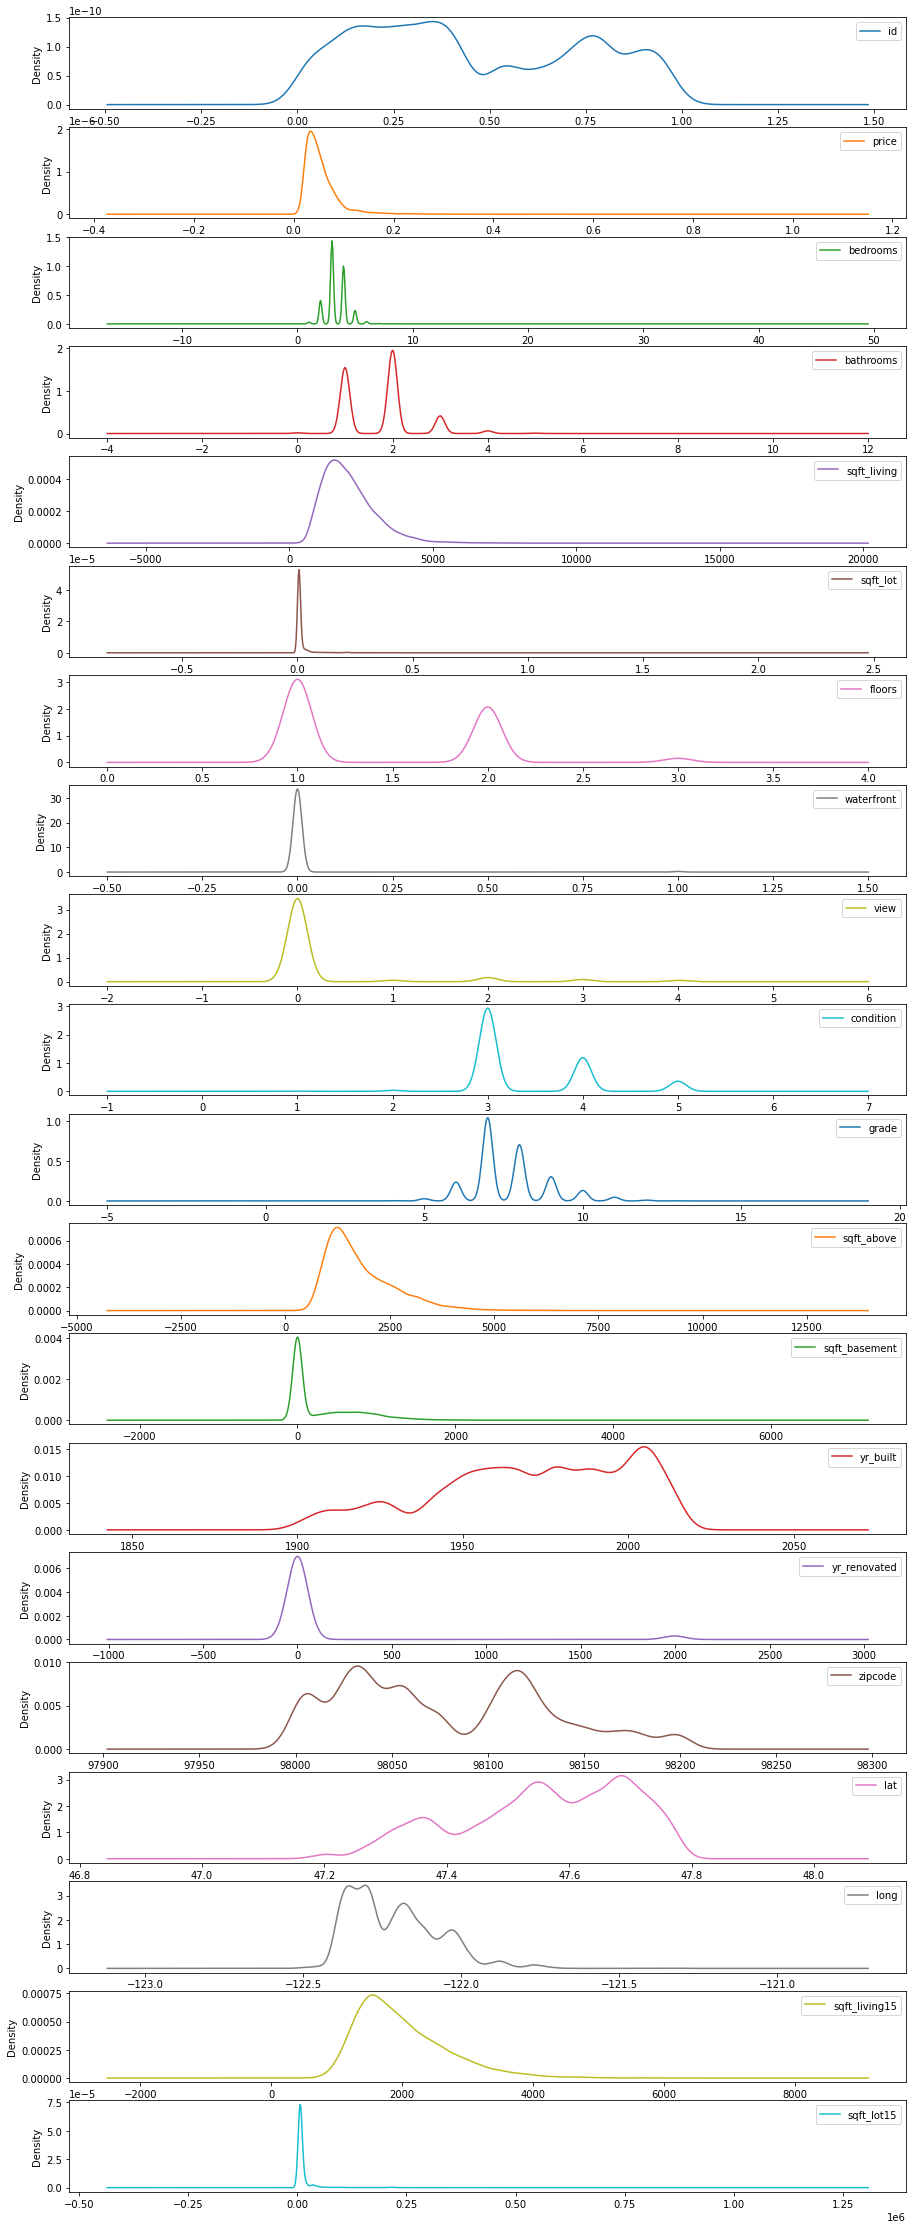

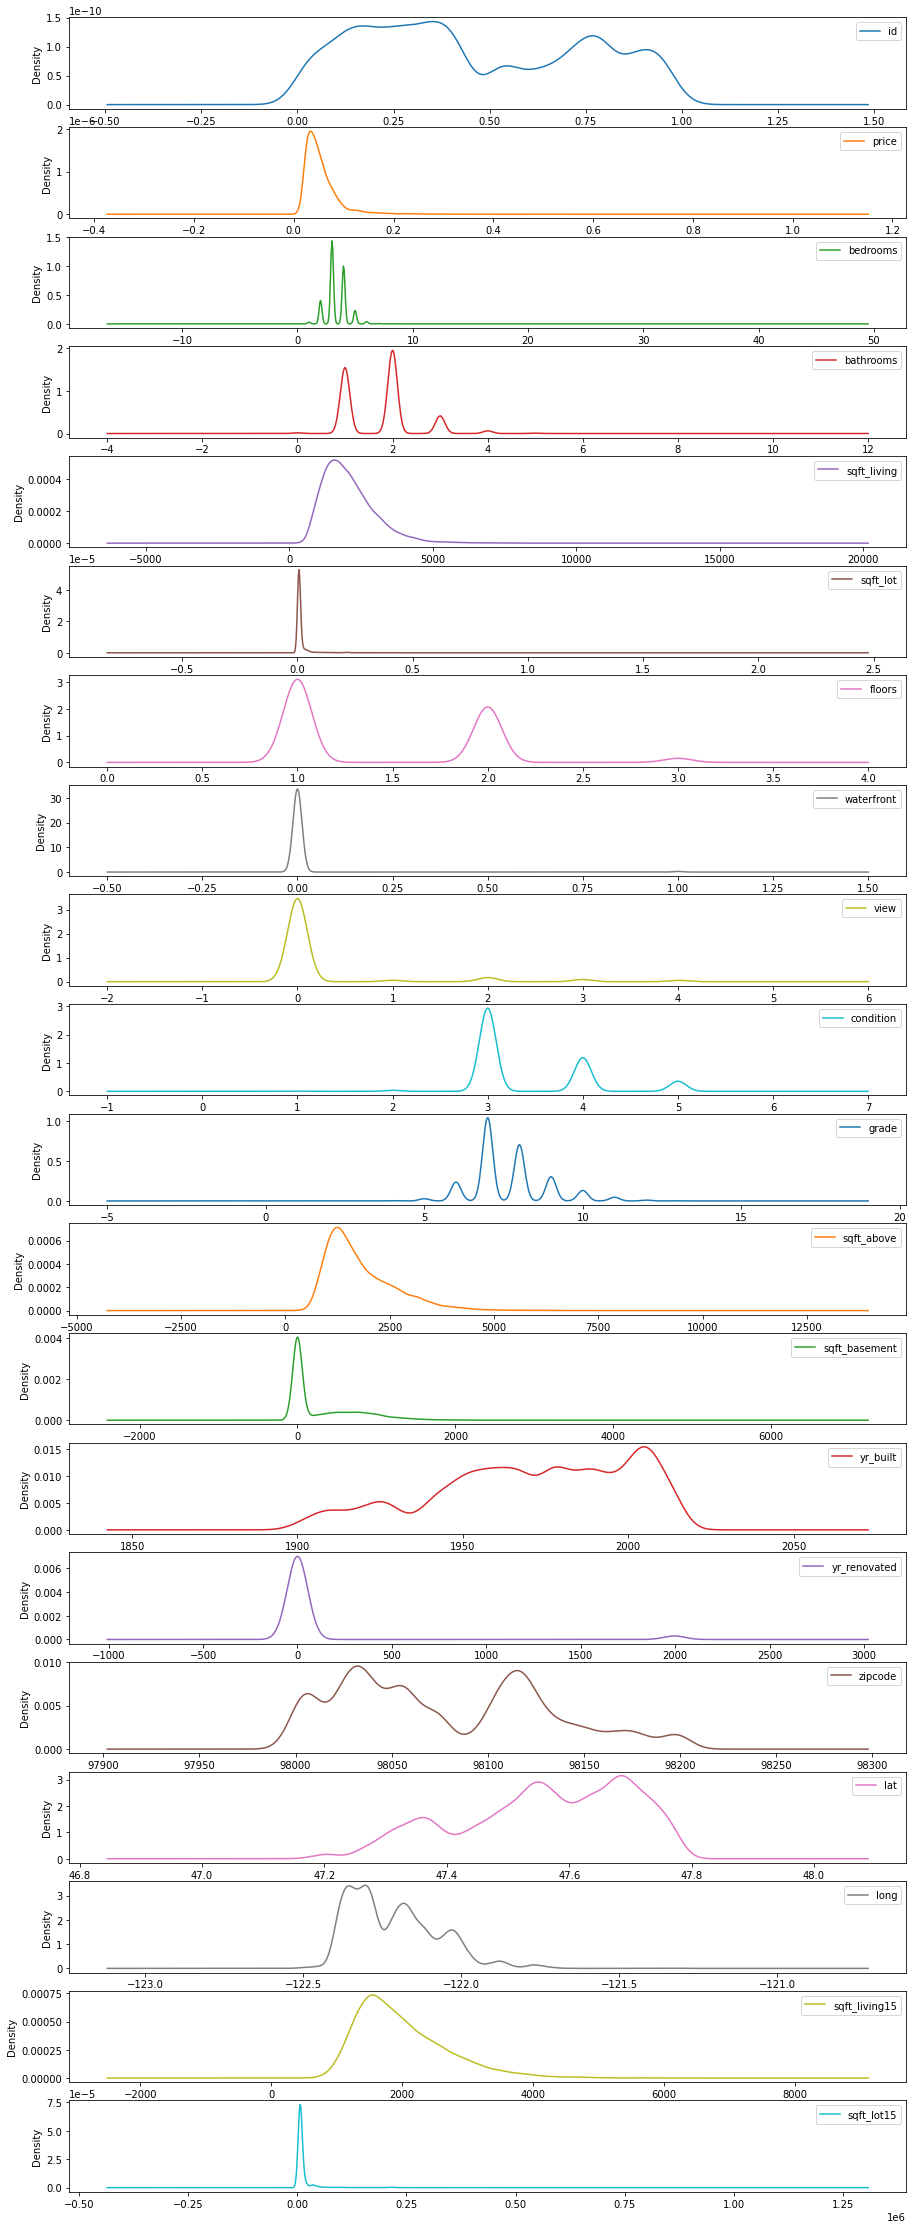

In [19]:
# Density plots are used to visualize the distribution of data over a period of time

columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
hass.plot(kind= 'density' , subplots=True, sharex=False,figsize=(15,40))
plt.show(0)

From the above analysis, most features exhibit a normal distribution with most of the datapoints being in a specific points which means that most of the data lies in such positions

Frequency 

3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


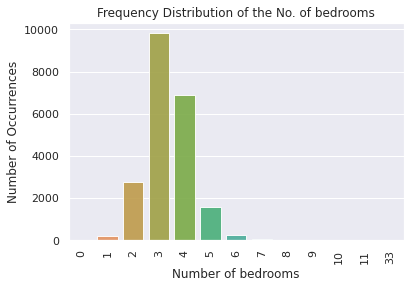

In [20]:
# Frequncy distribution to see how the number of bedrooms are distributed
# 
bedrm_count = hass['bedrooms'].value_counts()
print(bedrm_count)
sns.set(style="darkgrid")
sns.barplot(bedrm_count.index, bedrm_count.values, alpha=0.9)
plt.title('Frequency Distribution of the No. of bedrooms')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of bedrooms', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Most houses have 3 bedrooms, followed by houses with 4 bedrooms with 6 bedroom houses being few. There is a house with 33 bedrooms which is an outlier hence will not be dropped since it does not affect the distribution

2    10540
1     8354
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64


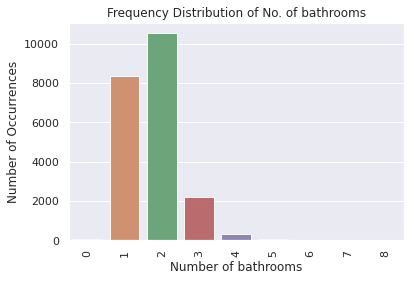

In [21]:
# Frequency distribution to see how the number of bathrooms are distributed
# 
bath_count = hass['bathrooms'].value_counts()
print(bath_count)
sns.set(style="darkgrid")
sns.barplot(bath_count.index, bath_count.values, alpha=0.9)
plt.title('Frequency Distribution of No. of bathrooms')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of bathrooms', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Most houses have 2 bathrooms , followed by houses with 1 bathroom with least houses having 4 bedrooms

1    12590
2     8399
3      621
Name: floors, dtype: int64


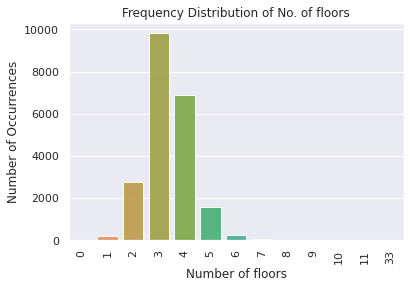

In [22]:
# Frequency distribution to see how the number of floors are distributed

floors_count = hass['floors'].value_counts()
print(floors_count)
sns.set(style="darkgrid")
sns.barplot(bedrm_count.index, bedrm_count.values, alpha=0.9)
plt.title('Frequency Distribution of No. of floors')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of floors', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Most houses in the analysis have 1 floor, with more than half being 2 floors and a small number of houses having 3 floors

0    21447
1      163
Name: waterfront, dtype: int64


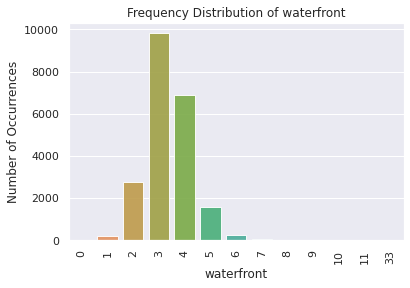

In [23]:
# Frequency distribution of the waterfront column which is boolean
# 
waterfront_count = hass['waterfront'].value_counts()
print(waterfront_count)
sns.set(style="darkgrid")
sns.barplot(bedrm_count.index, bedrm_count.values, alpha=0.9)
plt.title('Frequency Distribution of waterfront')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('waterfront', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Doing a value count of the waterfront column shows that most houses(21447) are not placed infront of a water body with only a few houses(163) having a waterbody view. Hence we will drop this feature since it doesn't affect price as much.

0    19487
2      963
3      509
1      332
4      319
Name: view, dtype: int64


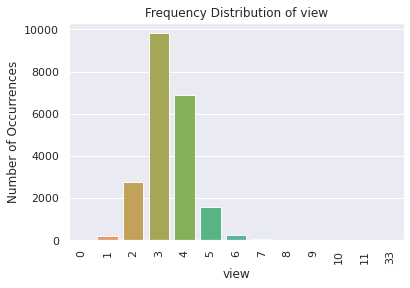

In [24]:
# Frequency distribution of the views column
# 
view_count = hass['view'].value_counts()
print(view_count)
sns.set(style="darkgrid")
sns.barplot(bedrm_count.index, bedrm_count.values, alpha=0.9)
plt.title('Frequency Distribution of view')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('view', fontsize=12)
plt.xticks(rotation=90)
plt.show()

From the analysis above, most houses have not been viewed. More than half of the total number of houses have been viwed more than 4 times and only afew have more than 5 views.
We also drop this column because it does not affect the prices

3    14029
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64


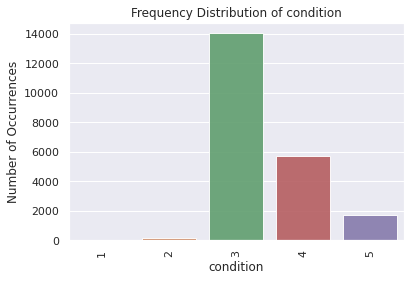

In [25]:
# Frequency distribution of condition column
# 
condition_count = hass['condition'].value_counts()
print(condition_count)
sns.set(style="darkgrid")
sns.barplot(condition_count.index,condition_count.values, alpha=0.9)
plt.title('Frequency Distribution of condition')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('condition', fontsize=12)
plt.xticks(rotation=90)
plt.show()

The range of values (1-5) shows a tally of the condition of the houses with the highest number(5) referring to the houses in a good condition. Most houses lied in position 3, with less than half houses not been in a not so bad condition

7     8981
8     6066
9     2614
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


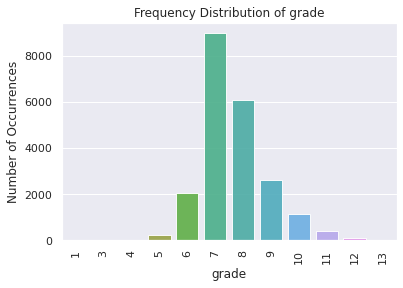

In [26]:
# Frequency distribution of grade column
# 
grade_count = hass['grade'].value_counts()
print(grade_count)
sns.set(style="darkgrid")
sns.barplot(grade_count.index,grade_count.values, alpha=0.9)
plt.title('Frequency Distribution of grade')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('grade', fontsize=12)
plt.xticks(rotation=90)
plt.show()

The analysis shows that the grade column is normally distributed and that most of the houses were graded at 7 followed by 8 and not so many houses got a high ranking in the grading

# **6. Feature Engineering**

In [27]:
# Getting an if renovated column
# 
hass.loc[hass['yr_renovated'] > 1, 'yr_renovated'] = 1

In [28]:
# Renaming the year renovated column
# 
hass.rename({"yr_renovated" : "if_renov"},axis=1, inplace=True)
hass.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,if_renov,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


0    20697
1      913
Name: if_renov, dtype: int64


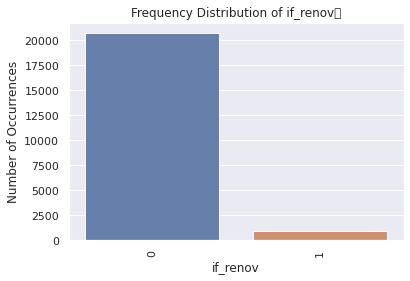

In [29]:
# Frequency distribution of the if_renov column
# 

if_renov_count = hass['if_renov'].value_counts()
print(if_renov_count)
sns.set(style="darkgrid")
sns.barplot(if_renov_count.index,if_renov_count.values, alpha=0.9)
plt.title('Frequency Distribution of if_renov	')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('if_renov', fontsize=12)
plt.xticks(rotation=90)
plt.show()

From the analysis above, most houses were not renovated

In [30]:
# Dropping unnecessary columns
# Getting the final dataframe for analysis
house_data = hass.drop(['id', 'lat', 'long','sqft_living15', 'sqft_lot15'], axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,if_renov,zipcode
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1,98125
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074


# Bivariate Analysis

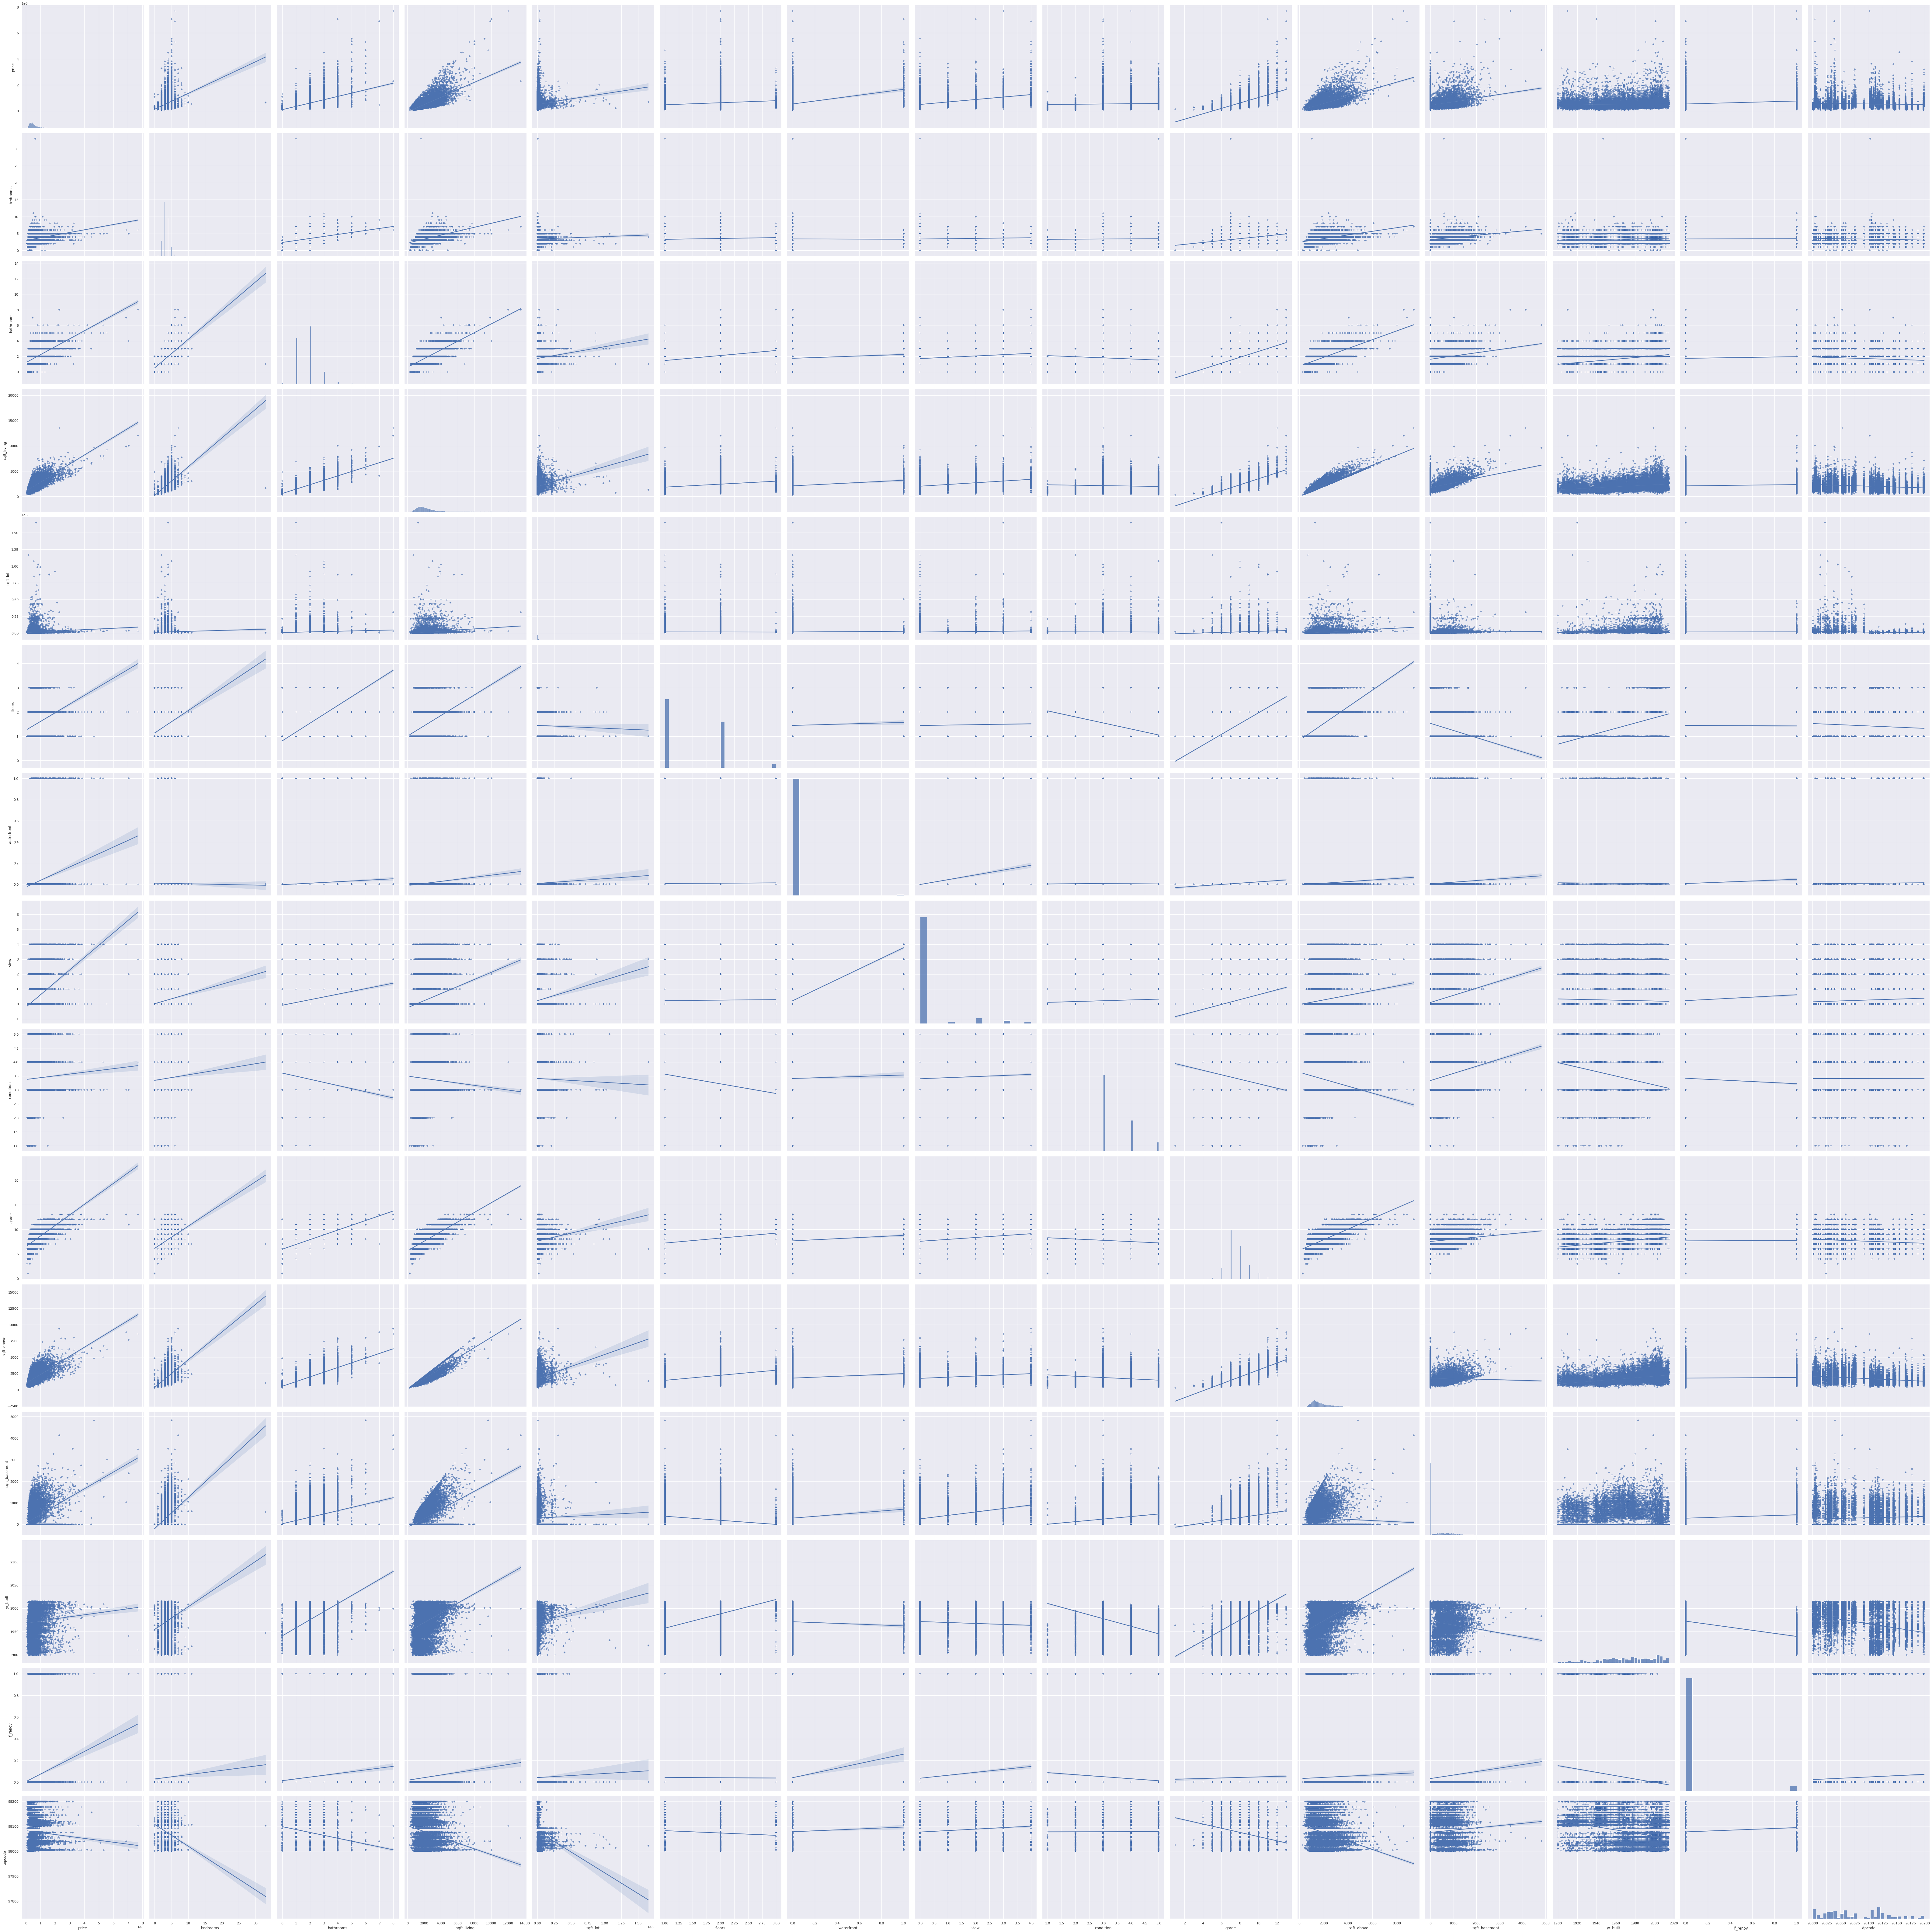

In [31]:
 #we use the pairplot() function of the seaborn package to plot the bivariate distributions

sns.pairplot(house_data, kind="reg",height=6,aspect=1, markers="+")


Pairplots plot the relationship betweeen a feature and other features in the dataset. Most of the features have a linear relationship with each other The zipcode shows some negative relationship with a couple of variables which means that a change of either brings a negative effect on the other.

# Multivariate Analysis

Heatmap

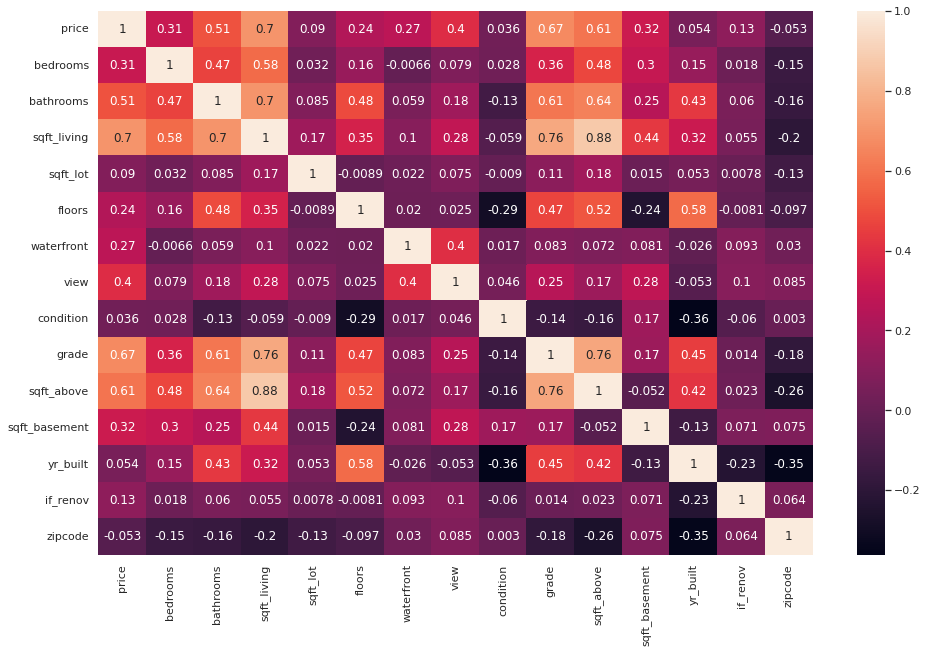

In [32]:
# Plotting a heatmap to see the correlation bewteen all the variables
# 
plt.figure(figsize=(16,10))
sns.heatmap(house_data.corr(), annot=True)
plt.show()

There's a high correlation between price and sqft_living (Square feet area of living area) which means an increase in living area positively affects price of a house.

A positive correlation is also observed between price and the sqft_above and grade. This means that an incease in the 2 variables affects price as well. Price and zipcode exhibit a negative correlation. In that zipcode doesn't affect price in a positive way

There is a negative correlation between the number of bedrooms and waterfront. This means that the variables are not related in anyway.

# **7. Checking for Multicollinearity**

In [33]:
# Getting a correlation between the variables
# 
corr = house_data.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,if_renov,zipcode
price,1.000000,0.308346,0.510096,0.702046,0.089658,0.237215,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126163,-0.053162
bedrooms,0.308346,1.000000,0.467519,0.576674,0.031699,0.155663,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018406,-0.152721
bathrooms,0.510096,0.467519,1.000000,0.697914,0.085313,0.484886,0.058799,0.177497,-0.125962,0.606661,0.639963,0.250920,0.433608,0.060253,-0.159755
sqft_living,0.702046,0.576674,0.697914,1.000000,0.172830,0.353327,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055045,-0.199435
sqft_lot,0.089658,0.031699,0.085313,0.172830,1.000000,-0.008919,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007780,-0.129611
floors,0.237215,0.155663,0.484886,0.353327,-0.008919,1.000000,0.019654,0.024528,-0.293188,0.472577,0.517903,-0.235802,0.578663,-0.008054,-0.096645
waterfront,0.266332,-0.006583,0.058799,0.103820,0.021601,0.019654,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.093360,0.030277
view,0.397466,0.079433,0.177497,0.284641,0.074753,0.024528,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103347,0.084838
condition,0.036397,0.028422,-0.125962,-0.058768,-0.008967,-0.293188,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060386,0.002962
grade,0.667478,0.357003,0.606661,0.762719,0.113644,0.472577,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.013965,-0.184795


There is a high correlation between a variable and itself. The other variables are also related to each other but not highly correlated.

A high positive correlation is where the corr value gets to 1. This is observed between a variable and itself which makes sense.e.g: Price has high positive correlation with itself.

A negative correlation is when we have a negative sign before the value. e.g:Price and zipcode have a negative correlation.

Let's use these correlations to compute the VIF score for each variable. We create a new dataframe with the inverse of the matrix above.

In [34]:
# Creating a dataframe of the VIF
VIF = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
VIF

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,if_renov,zipcode
price,2.892403,0.279208,-0.309426,-4.641115e+00,0.085576,-0.097503,-0.392211,-0.274043,-0.100252,-1.158493,3.020204e+00,1.624518e+00,0.829366,-0.024803,0.017580
bedrooms,0.279208,1.642137,-0.322179,-1.825561e-01,0.123532,0.059156,0.023504,0.084120,-0.074693,0.183473,-8.552309e-01,-5.025025e-01,0.115554,0.021756,0.076349
bathrooms,-0.309426,-0.322179,2.432752,-7.770002e-01,-0.002003,-0.526954,0.054986,0.010127,-0.033039,-0.006604,-7.400002e-02,-2.466667e-01,-0.497083,-0.159899,-0.050545
sqft_living,-4.604863,-0.214035,-0.777936,2.253457e+14,-0.080088,0.253585,0.899869,-0.312477,-0.232055,4.933447,-2.031763e+14,-1.085871e+14,-2.349091,-0.255440,0.047976
sqft_lot,0.085576,0.123532,-0.002003,-7.708214e-02,1.073142,0.145256,0.005490,-0.066387,0.004417,0.042191,-3.113302e-01,-2.667770e-02,-0.000221,-0.007008,0.095242
floors,-0.097503,0.059156,-0.526954,3.050192e-01,0.145256,2.120558,0.004302,-0.005138,0.079687,-0.215791,-5.504755e-01,4.236901e-01,-0.822297,-0.134119,-0.287486
waterfront,-0.392211,0.023504,0.054986,9.065356e-01,0.005490,0.004302,1.255341,-0.451801,-0.001375,0.221211,-7.493047e-01,-3.523828e-01,-0.130423,-0.065142,0.004254
view,-0.274043,0.084120,0.010127,-3.219305e-01,-0.066387,-0.005138,-0.451801,1.414568,-0.011055,-0.147480,2.603826e-01,-9.538500e-02,0.063938,-0.029977,-0.107244
condition,-0.100252,-0.074693,-0.033039,-2.280884e-01,0.004417,0.079687,-0.001375,-0.011055,1.242106,0.020167,2.981545e-01,1.807079e-02,0.475194,0.193008,0.170769
grade,-1.158493,0.183473,-0.006604,5.015085e+00,0.042191,-0.215791,0.221211,-0.147480,0.020167,3.441314,-6.090602e+00,-2.891014e+00,-0.794181,-0.016374,-0.057317


Variance Inflation Factor (VIF) is a measure of colinearity between the predictor variables.

The VIF score for each variable is found alongside the downwards sloping diagonal. Price has a VIF score of 2.892403, bedrooms has a score of 1.642137 etc.

A value of 1 means that the predictor is not correlated with other variables Any value above 5 would be a problem but from the analysis above, none of the features have such a value

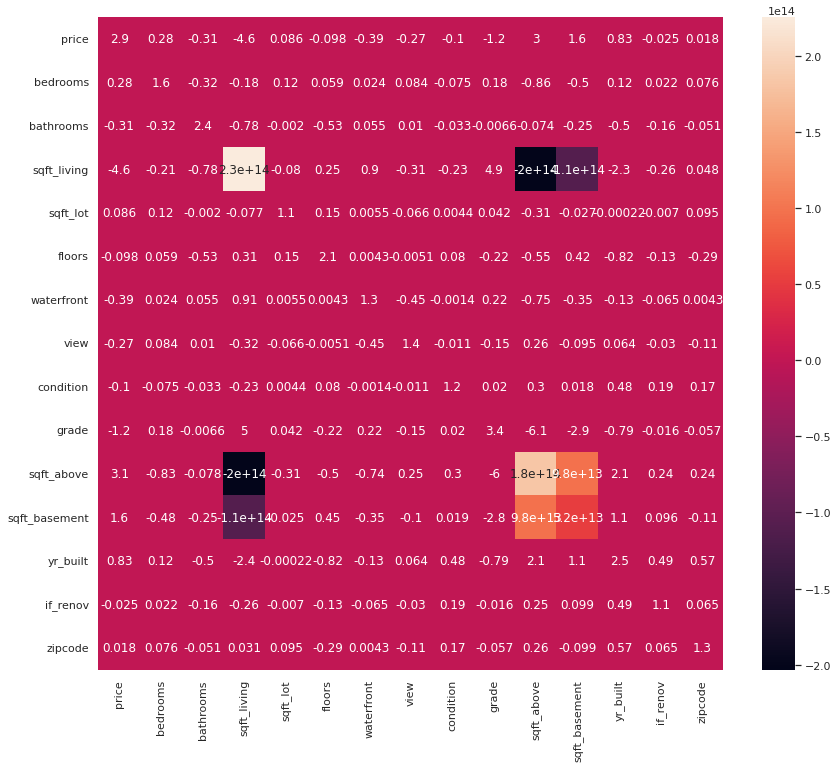

In [36]:
# Creating a heatmap to visualize the VIF calculated above
# 
plt.figure(figsize = (14, 12))
sns.heatmap(VIF, annot = True)
plt.show()

# **8. Implementing the Solution**

I'll start by creating a baseline model using Linear regression to use it for comparison with other models

# Baseline Model Using Linear Regression

In [37]:
# Dividing data in a feature set and corresponding labels
# x is the independent variable
# y is the target variable(price)
# 
X = house_data.drop(columns = ['price'], axis=1)
y = hass['price']

# The code above separates the predictor variables(x) from the target variable(y) which is price

In [38]:
# importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import scipy as sp

# Creating a baseline model using linear regression
# 
#  Split data to train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)
#
# Standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit our model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)


539365.0871702917
[ -35798.00858212   38111.04853972   79548.47410476  -10479.26628089
   11733.64053656   54382.58338977   34570.58894252   13233.08048873
  146801.87555541   67766.06898963   38376.08216834 -103794.46548522
    3027.346467     -1705.86014655]


In [39]:
# Making Predictions to see how the model functions

y_pred = regressor.predict(X_test)
# To compare the actual output values for X_test with the predicted values
# 
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred })
comparison_df.describe()

,Actual,Predicted
count,4.322000e+03,4.322000e+03
mean,5.434344e+05,5.393042e+05
std,3.625612e+05,3.033915e+05
min,8.100000e+04,-6.058143e+05
25%,3.230000e+05,3.389235e+05
50%,4.500000e+05,4.695291e+05
75%,6.500000e+05,6.709266e+05
max,4.000000e+06,2.377949e+06


In [40]:
# Model evaluation

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 139468.3083938954
Mean Squared Error: 44216921338.1094
Root Mean Squared Error: 210278.1998641547


From the analysis above, RMSE exhibits a lower value which is good compared to the rest.

The lower the RMSE of a model, the better the performance of the model. Therefore, this model is fairly good in making predictions

In [42]:
# checking the accuracy
# importing appropriate library
from sklearn.metrics import r2_score

print("Linear R2 score is ",round(r2_score(y_test, y_pred),2))

Linear R2 score is  0.66


# **a) Multiple Linear Regression**

# Using Polynomial Regression

polynomial regression is a special type of multiple regression and hence we will perform polynomial regression to create the model

In [43]:
#  Split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)
#
# Standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 2)
X_pol = poly_features.fit_transform(X_train)

# Fitting the polynomial model
PolyReg = LinearRegression()
PolyReg.fit(X_pol, y_train)

# Making predictions
y_pred_ply = PolyReg.predict(poly_features.fit_transform(X_test))

# Measuring the accuracy of the model

from sklearn import metrics
 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ply))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ply))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ply)))

Mean Absolute Error: 127237.26353540027
Mean Squared Error: 37174336517.57589
Root Mean Squared Error: 192806.47426260324


Comparing the RMSE of 192806.47426260324 from Polynomial with RMSE of 210278.1998641547 from Linear regression, we see that the value went down which means that polynomial reg fitted the data better.

In [44]:
# Making predictions to see model performance

poly_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ply})
poly_df

,Actual,Predicted
9790,680200.0,564984.0
10280,550000.0,438944.0
21572,230000.0,380480.0
20060,379950.0,478896.0
21204,1060000.0,824368.0
...,...,...
17762,300000.0,327120.0
13211,395000.0,582512.0
8108,395000.0,531792.0
19728,489000.0,454320.0


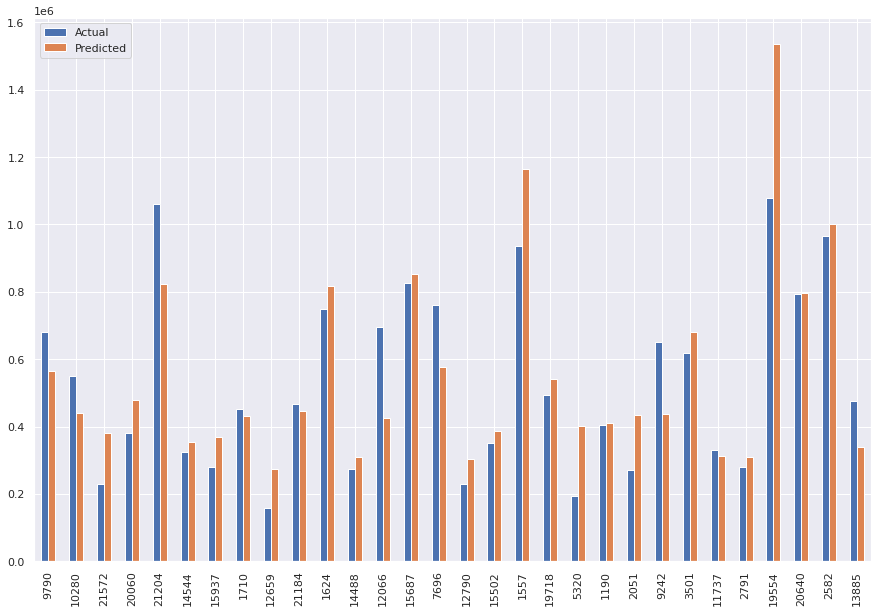

In [46]:
# A visualization of the above dataframe

poly_df[:30].plot(figsize=(15,10),kind='bar')
plt.show()

Most predictions are close to the actual value which means that the model is good

In [47]:
# Checking for accuracy of the model to compare with the baseline model.

print("Polynomial R2 score is ",round(r2_score(y_test, y_pred_ply),2))

Polynomial R2 score is  0.72


We observe an improvement of the model from a score of 0.66 to 0.72 fro the polynomial. This means that polynomial models makes good predictions

In [49]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21610 non-null  float64
 1   bedrooms       21610 non-null  int64  
 2   bathrooms      21610 non-null  int64  
 3   sqft_living    21610 non-null  int64  
 4   sqft_lot       21610 non-null  int64  
 5   floors         21610 non-null  int64  
 6   waterfront     21610 non-null  int64  
 7   view           21610 non-null  int64  
 8   condition      21610 non-null  int64  
 9   grade          21610 non-null  int64  
 10  sqft_above     21610 non-null  int64  
 11  sqft_basement  21610 non-null  int64  
 12  yr_built       21610 non-null  int64  
 13  if_renov       21610 non-null  int64  
 14  zipcode        21610 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 3.1 MB


# **b) Quantile Regression**

In [51]:
#Separating training and testing datasets

Q = house_data.drop(['sqft_living','condition','grade','waterfront','if_renov'], axis=1) 
y = house_data['price']    
# 9:49
from sklearn.model_selection import train_test_split
Q_train, Q_test, y_train, y_test = train_test_split(Q,y, test_size=0.2, random_state=24)
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ Q', house_data)
res = mod.fit(q=.8)
  # Then print out the summary of our model
  #
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   1.266e-05
Method:                 Least Squares   Sparsity:                    0.0002410
Date:                Sun, 24 Apr 2022   No. Observations:                21610
Time:                        11:37:21   Df Residuals:                    21599
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.001e-10   6.43e-10     -0.467      0.641   -1.56e-09    9.61e-10
Q[0]           1.0000   3.06e-12   3.27e+11      0.000       1.000       1.000
Q[1]       -1.146e-06   1.36e-06     -0.842      0.400   -3.81e-06    1.52e-06
Q[2]        1.416e-07      2e-06      0.071      0.9

In [52]:
# Making Predictions
# 
pred = res.predict(Q)
# To compare the actual output values for Q_test with the predicted values
# 
Q1 = pd.DataFrame({'Actual': y, 'Predicted': pred})
print(Q1.sample(4))

from sklearn.metrics import r2_score
z = r2_score(y, pred)
print("Polynomial R2 score is " + str(z))

          Actual     Predicted
7423    935100.0  9.351000e+05
18988   140000.0  1.400000e+05
11398  1710000.0  1.710000e+06
21569   329000.0  3.290000e+05
Polynomial R2 score is 1.0


A score of 1 means that the data predidcted fits perfectly.

# **c) Ridge Regression**

Ridge regression is a type regularization is a process of penalizing coefficients of variables either by removing them and or reducing their impact. Ridge regression reduces the effect of problematic variables close to zero but never fully removes them.

In [53]:
R = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'if_renov', 'zipcode']]
y = house_data['price']  

In [54]:
# creating ridge model with hyperparameter tuning
#  Split data to train and test data
R_train, R_test, y_train, y_test = train_test_split(R,y, test_size=.2, random_state=0)

# importing appropriate libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

Code explanation

In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization(hyperparameter) that is used in ridge regression. Determining the value of a hyperparameter requires the use of a grid.

In the code above, we first create our ridge model and indicate normalization in order to get better estimates then get grid that we will use.

Alpha is hyperparameter we are trying to set. The log space is the range of values we want to test. cv is the number of folds to develop for the cross-validation.

In [55]:
# We use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength

search.fit(R_train,y_train)
print(search.best_params_)
{'alpha': 0.001}
print(abs(search.best_score_))

# The best_params_ tells us what to set alpha too which in this case is 0.001. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 47161040559.118385 is worse than what the baseline model was. 

{'alpha': 0.001}
47693522273.302246


In [56]:
# Fitting the model

ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(R_train,y_train)
y_pred_Rg = ridge.predict(R_test)

# Measuring the accuracy of the model 
ridge_model =np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred = ridge.predict(R_test)))
ridge_model

210273.52551576248

From the analysis above, we can observe that the ridge model does not perform well compares to the baseline model. This means that it's not the best model the company should consider

# **d) Lasso Regression**

Other than Lasso performing regulaziration, it also does feature selection. It penalizes the absolute size of the regression coefficient

In [57]:
# Setting up our X and y datasets
#
L = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'if_renov', 'zipcode']]
y = house_data['price']

# Importing linear models
from sklearn.linear_model import Lasso,LinearRegression
from sklearn import linear_model
# Splitting data to train and test data
L_train, L_test, y_train, y_test = train_test_split(L, y, test_size=0.2, random_state=0)

# Creating lasso object
lasso = linear_model.Lasso() 

# Fitting the models
lasso.fit(L_train, y_train) 

# Making prediction
y_pred_Ls = lasso.predict(L_test)

# Print scores
print("lasso score:", lasso.score(L_train, y_train)) 

# printing the RMSE

np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred = ridge.predict(R_test)))

lasso score: 0.6517099078905975


210273.52551576248

We use the whole dataset without splitting and set Alpha = 1. That yields a bigger RMSE compared to the linear RMSE. We proceed to get a viable alpha using crossvalidation

# Hyperparameter tuning using crossvalidation

In [58]:
# Splitting data to train and test data
L_train, L_test, y_train, y_test = train_test_split(L, y, test_size=0.2, random_state=0)

# choosing the regularization parameter with the help of GridSearch.
params = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, params, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(L_train, y_train) 
linear.fit(L_train, y_train) 
y_pred_Ls1 = gridlasso.predict(L_test)
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(L_test, y_test))
print("lasso MSE:",np.sqrt(mean_squared_error(y_test, gridlasso.predict(L_test))))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)


lasso best parameters: {'alpha': 0.1}
lasso score: 0.6635459232315786
lasso MSE: 210278.04940024833
lasso best estimator coef: [-3.82861846e+04  5.17778638e+04  3.06008139e+02 -2.48897901e-01
  2.12647933e+04  6.39329735e+05  4.51578949e+04  2.04004003e+04
  1.25513228e+05 -1.37975874e+02 -1.33469820e+02 -3.54142364e+03
  1.49249178e+04 -3.19126909e+01]


Upon involving crossvalidation, the model improves by a good percentage in that checking the prediction and visualization shows a close range prediction compared to Polynomial regression

In [61]:
lasso_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_Ls1})
lasso_df

,Actual,Predicted
9790,680200.0,616458.151794
10280,550000.0,439552.110355
21572,230000.0,236195.970397
20060,379950.0,498363.206750
21204,1060000.0,863037.333282
...,...,...
17762,300000.0,232177.597902
13211,395000.0,697471.634709
8108,395000.0,588435.156294
19728,489000.0,436849.089576


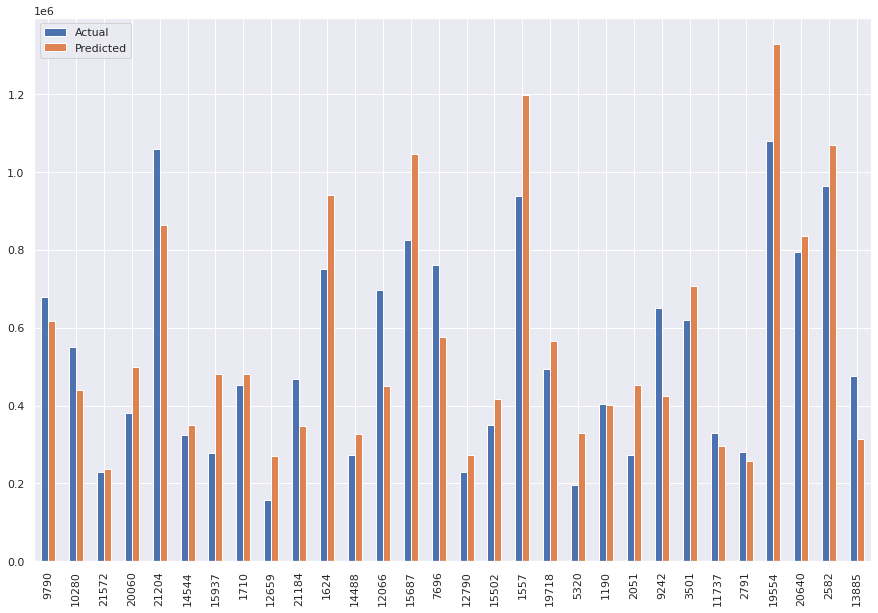

In [62]:
# A visualization of the lasso prediction dataframe

lasso_df[:30].plot(figsize=(15,10),kind='bar')
plt.show()

In [63]:
print("Lasso R2 score is ",round(r2_score(y_test, y_pred_Ls1),4))

Lasso R2 score is  0.6635


# **e) Elastic Net Regression**

Elastic net is a combination of both Lasso and ridge regression. It can remove weak variables all together as with lasso or reduce them to close to 0 as with ridge

In [64]:
#import necessary library
from sklearn.linear_model import ElasticNet

# Loading X and y data

D = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'if_renov', 'zipcode']]
y = house_data['price']

# Splitting data to train and test data
D_train, D_test, y_train, y_test = train_test_split(D, y, test_size=0.2, random_state=0)

In [65]:
# We start by normalizing the data followed by a grid search

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
                                                  'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(D_train,y_train)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


47737229048.33402

In [69]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 48265558938.39576. This is above our baseline model of MSE 44216921338.1094 for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 

elastic= ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(D_train,y_train)
y_pred_el = elastic.predict(D_test)
elas_model=(np.sqrt(mean_squared_error(y_test ,elastic.predict(D_test))))
print(elas_model)
#print('Root Mean Squared Error_Linear:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

#print("lasso MSE:",np.sqrt(mean_squared_error(y_test, gridlasso.predict(L_test))))

278074.7078193561


In [70]:
# checking the accuracy of the model.
print("Ridge R2 score is ",round(r2_score(y_test, y_pred_el),3))

Ridge R2 score is  0.412


A score of 41.2% is quite low compared to other models. This means that elastic net is not a good predictor

# **9. Challenging the solution**



From the above modelling polynomial regression proved to work well compared to other models in prediction in that the predictions variance wasn't big.

# **10. Follow Up Questions**

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

# a) Did we have the right data?

From the analysis above, better predictions could have been done if more features where provided

# b) Do we need other data to answer our question?

> More data should be provided for better predictions


# c). Did we have the right question?

The provided question was qood only that the data was not enough to answer the question

# **11. Conclusion**

Linear Regression and Lasso Regression yield accurate models and can be used for prediction.